# **Netflix Data: Cleaning, Analysis and Visualization**



*  The Netflix dataset provides detailed information about movies and TV shows available on the platform, including their title, type, release year, cast, country, genre, ratings, and the date they were added to Netflix. Analyzing this data helps us understand global content trends, viewer preferences, and Netflix’s content strategy.


*  In this project, we clean the dataset by handling missing values, correcting inconsistent formats, and creating useful derived features. After cleaning, we explore the data through visualizations to identify patterns such as the growth of Netflix’s catalog, genre popularity, top contributing countries, release trends, and content durations. This analysis offers insights into how Netflix builds its library and how its content has evolved over time.






# **Installs and imports**

In [17]:

!pip install wordcloud --quiet

In [18]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from IPython.display import display
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (10,6)

# **Load the Excel file**

In [19]:
possible_paths = [
    "/content/netflix1.csv",
    "/content/netflix_titles.csv",
    "/mnt/data/netflix1.csv",
    "/mnt/data/netflix_titles.csv",
    "netflix1.csv",
    "netflix_titles.csv"
]
csv_path = None
for p in possible_paths:
    if os.path.exists(p):
        csv_path = p
        break
if csv_path is None:
    from google.colab import files
    print("CSV not found in common locations. Please upload the CSV now (choose netflix1.csv).")
    uploaded = files.upload()
    csv_path = list(uploaded.keys())[0]
print("Loading CSV from:", csv_path)
df = pd.read_csv(csv_path)
display(df.head())
print("\nShape:", df.shape)

CSV not found in common locations. Please upload the CSV now (choose netflix1.csv).


Saving netflix1.csv to netflix1.csv
Loading CSV from: netflix1.csv


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"



Shape: (8790, 10)


In [20]:
print("Missing values per column:\n", df.isnull().sum())
print("\nDtypes:\n", df.dtypes)
df = df.drop_duplicates().reset_index(drop=True)
text_cols = df.select_dtypes(include='object').columns.tolist()
for c in text_cols:
    df[c] = df[c].replace(r'^\s*$', np.nan, regex=True)
if 'date_added' in df.columns:
    try:
        df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    except Exception as e:
        print("date_added parse error:", e)
if 'date_added' in df.columns and df['date_added'].notna().any():
    df['year_added']  = df['date_added'].dt.year
    df['month_added'] = df['date_added'].dt.month
else:
    if 'release_year' in df.columns:
        df['year_added'] = df['release_year']
print("\nAfter cleaning: shape =", df.shape)
display(df.head())



Missing values per column:
 show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Dtypes:
 show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

After cleaning: shape = (8790, 12)


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9


# **Content type distribution**

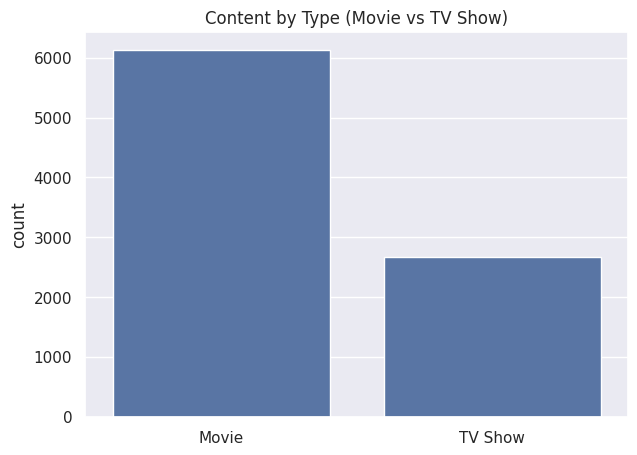

In [21]:

if 'type' in df.columns:
    plt.figure(figsize=(7,5))
    sns.countplot(data=df, x='type')
    plt.title('Content by Type (Movie vs TV Show)')
    plt.xlabel('')
    plt.show()
else:
    print("'type' column not found in dataset.")

# **Top countries**

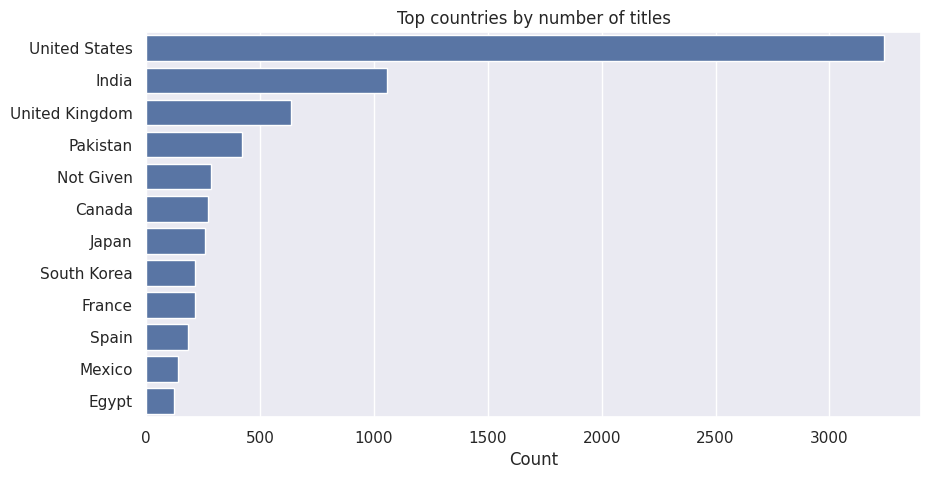

In [22]:

if 'country' in df.columns:
    top_countries = df['country'].value_counts().nlargest(12)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_countries.values, y=top_countries.index)
    plt.title('Top countries by number of titles')
    plt.xlabel('Count')
    plt.ylabel('')
    plt.show()
else:
    print("'country' column not found.")

# **Content added over time**

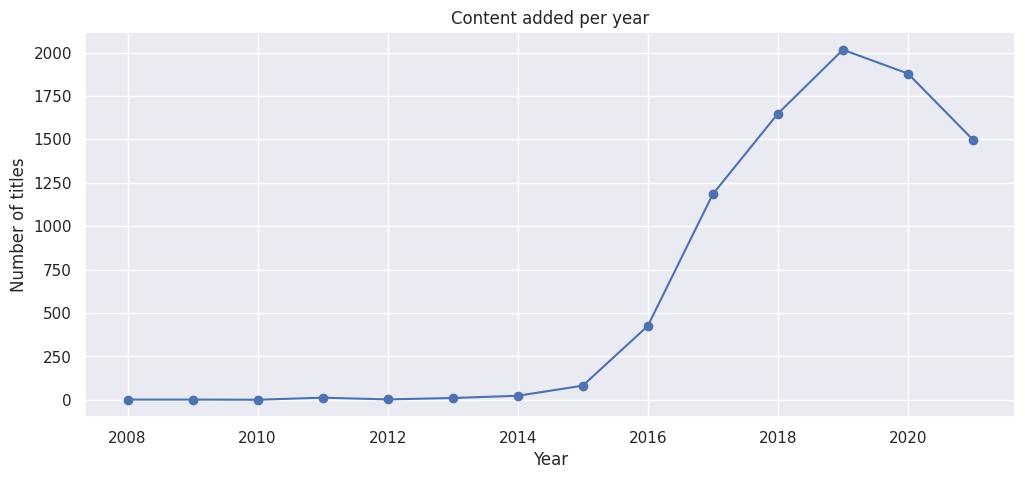

In [23]:

if 'year_added' in df.columns:
    yearly = df['year_added'].value_counts().sort_index()
    plt.figure(figsize=(12,5))
    plt.plot(yearly.index, yearly.values, marker='o')
    plt.title('Content added per year')
    plt.xlabel('Year')
    plt.ylabel('Number of titles')
    plt.grid(True)
    plt.show()
else:
    print("'year_added' not available.")

# **Top directors**

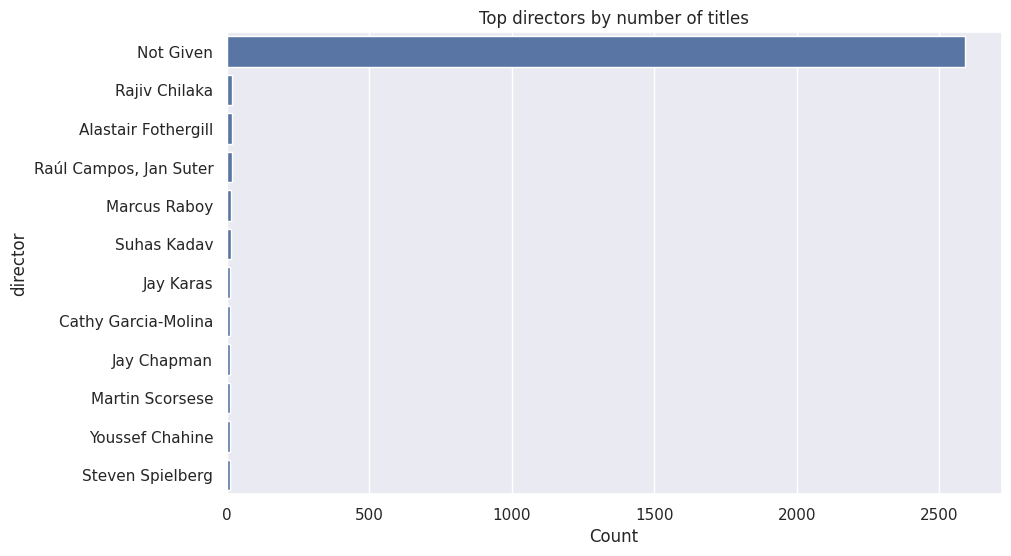

In [24]:
if 'director' in df.columns:
    directors = df['director'].dropna().value_counts().nlargest(12)
    plt.figure(figsize=(10,6))
    sns.barplot(x=directors.values, y=directors.index)
    plt.title('Top directors by number of titles')
    plt.xlabel('Count')
    plt.show()
else:
    print("'director' column not found.")


# **Word cloud of movie titles**

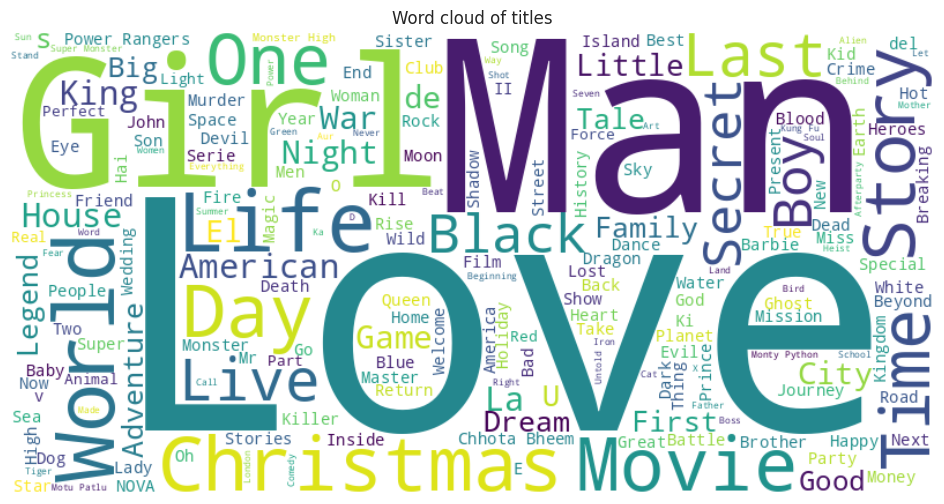

In [25]:

if 'title' in df.columns:
    titles = df['title'].dropna().astype(str)
    txt = " ".join(titles.tolist())
    wc = WordCloud(width=800, height=400, background_color='white').generate(txt)
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word cloud of titles')
    plt.show()
else:
    print("'title' column not found.")


# **Extract duration in minutes for Movies only**

In [26]:

if "duration" in df.columns and "type" in df.columns:
    df['duration_minutes'] = df['duration'].str.extract(r'(\d+)').astype(float)
    movie_df = df[df['type'] == 'Movie']
    display(movie_df[['title', 'duration', 'duration_minutes']].head())
else:
    print("Required columns 'duration' or 'type' not found.")

,title,duration,duration_minutes
0,Dick Johnson Is Dead,90 min,90.0
3,Confessions of an Invisible Girl,91 min,91.0
4,Sankofa,125 min,125.0
6,The Starling,104 min,104.0
7,Motu Patlu in the Game of Zones,87 min,87.0


# **Histogram of Movie Duration**

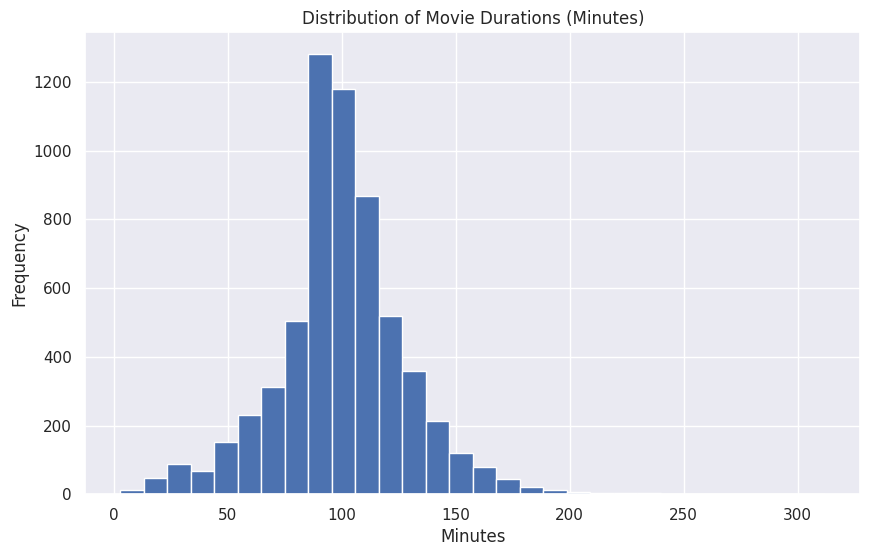

In [27]:

if "duration_minutes" in df.columns:
    plt.figure(figsize=(10,6))
    plt.hist(df[df['type']=="Movie"]['duration_minutes'].dropna(), bins=30)
    plt.title("Distribution of Movie Durations (Minutes)")
    plt.xlabel("Minutes")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("'duration_minutes' not available.")

# **TV Show seasons count distribution**

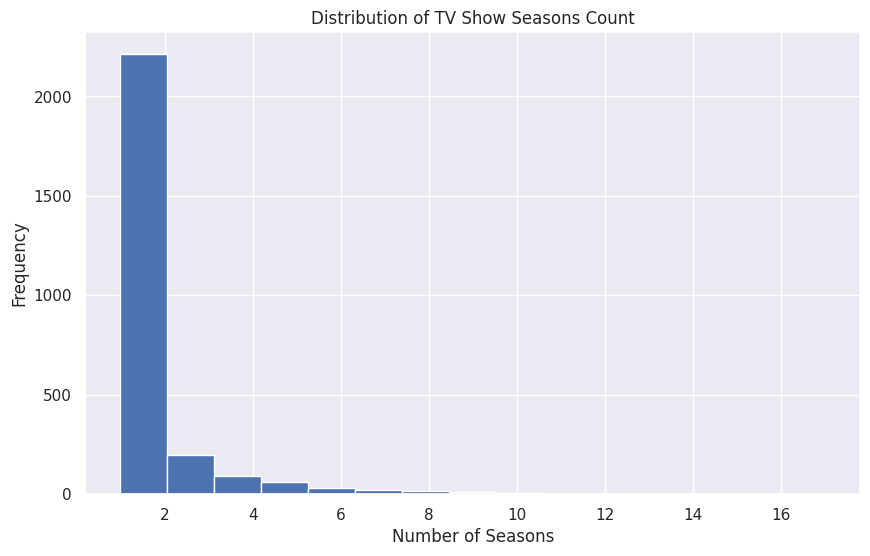

In [28]:

if "duration" in df.columns:
    tv_df = df[df['type']=="TV Show"].copy()
    tv_df['seasons'] = tv_df['duration'].str.extract(r'(\d+)').astype(float)
    plt.figure(figsize=(10,6))
    plt.hist(tv_df['seasons'].dropna(), bins=15)
    plt.title("Distribution of TV Show Seasons Count")
    plt.xlabel("Number of Seasons")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("'duration' column not found.")

# **Rating distribution (Bar Plot)**


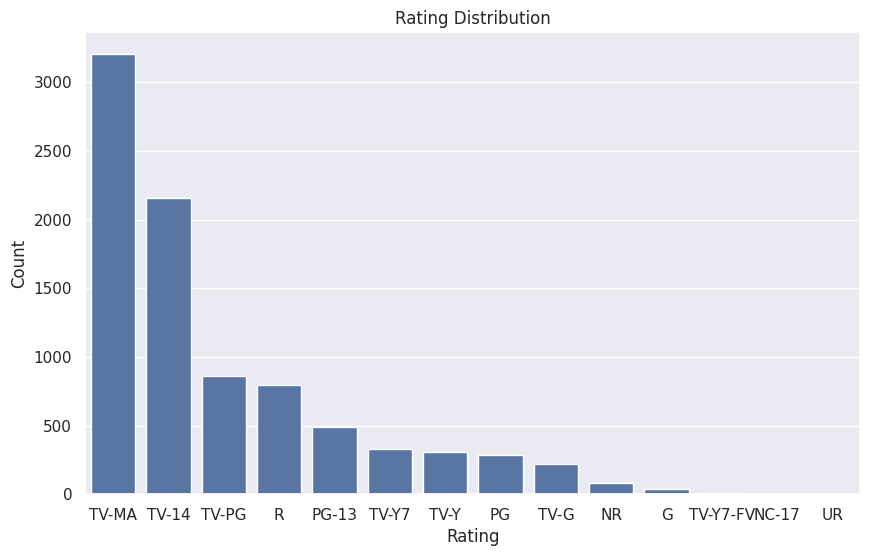

In [29]:

if "rating" in df.columns:
    rating_counts = df['rating'].value_counts().head(15)
    plt.figure(figsize=(10,6))
    sns.barplot(x=rating_counts.index, y=rating_counts.values)
    plt.title("Rating Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.show()
else:
    print("'rating' column not found.")

# **Monthly release pattern**

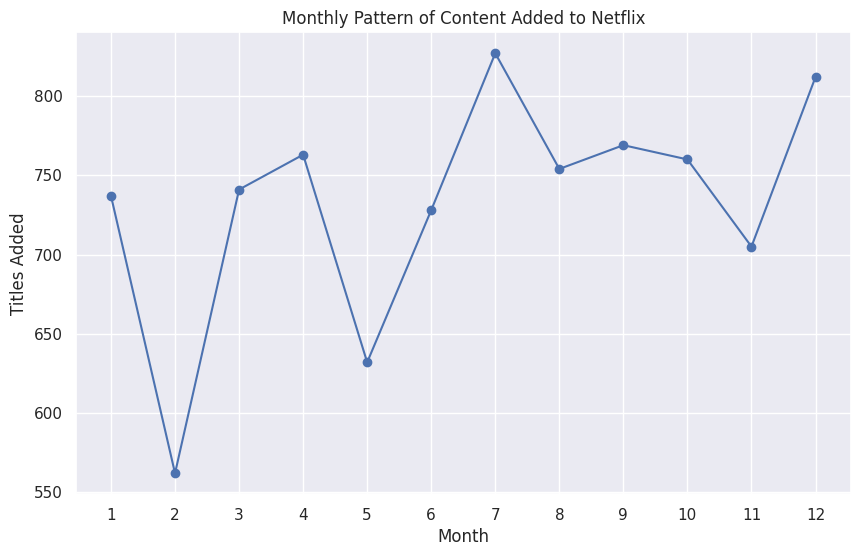

In [30]:

if "month_added" in df.columns:
    monthly = df['month_added'].value_counts().sort_index()
    plt.figure(figsize=(10,6))
    plt.plot(monthly.index, monthly.values, marker='o')
    plt.title("Monthly Pattern of Content Added to Netflix")
    plt.xlabel("Month")
    plt.ylabel("Titles Added")
    plt.xticks(range(1,13))
    plt.grid(True)
    plt.show()
else:
    print("'month_added' column not found.")

# **Genre heatmap**

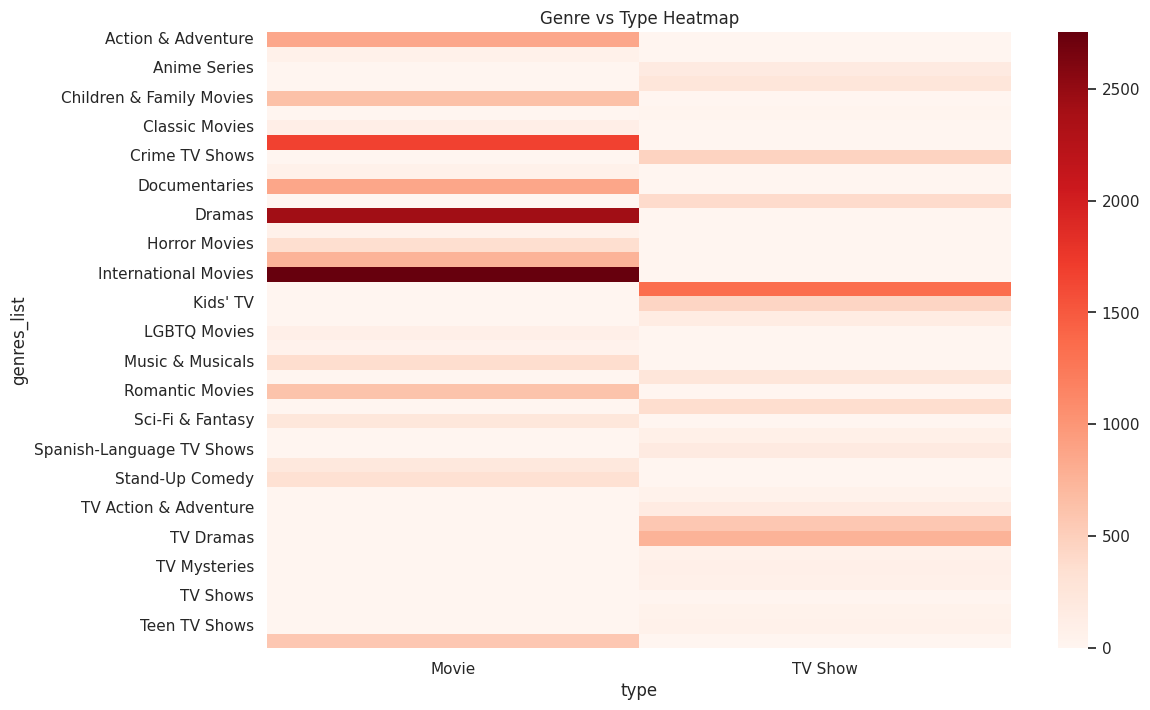

In [40]:
if "genres_list" in df.columns and "type" in df.columns:
    genre_type = df.explode('genres_list')
    table = pd.crosstab(genre_type['genres_list'], genre_type['type'])
    plt.figure(figsize=(12,8))
    sns.heatmap(table, cmap="Reds")
    plt.title("Genre vs Type Heatmap")
    plt.show()
else:
    print("Required columns 'genres_list' or 'type' missing.")


# **Correlation heatmap**

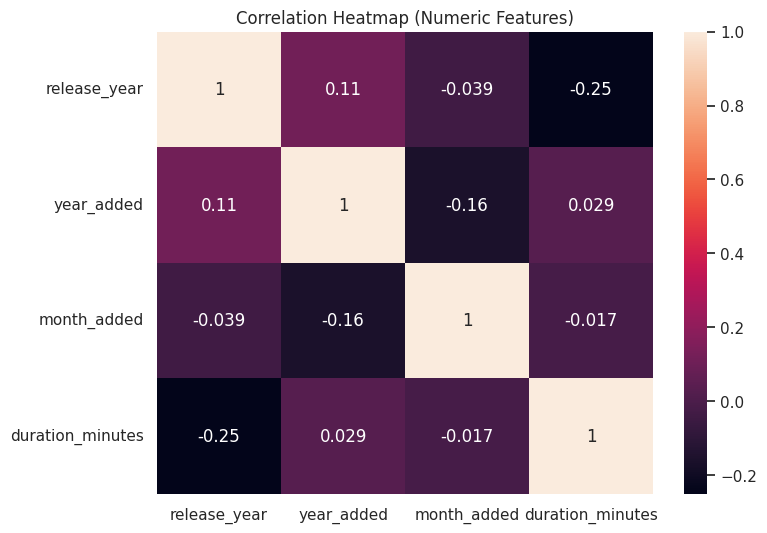

In [37]:

num_df = df.select_dtypes(include=np.number)
if num_df.shape[1] > 0:
    plt.figure(figsize=(8,6))
    sns.heatmap(num_df.corr(), annot=True)
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.show()
else:
    print("No numeric columns available.")

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
ml_df = df[(df['type']=="Movie") & (df['duration_minutes'].notna())].copy()
ml_df['country_count'] = ml_df['country'].str.split(',').apply(lambda x: len(x) if isinstance(x,list) else 0)
ml_df['genre_count'] = ml_df['genres_list'].apply(lambda x: len(x) if isinstance(x,list) else 0)
X = ml_df[['release_year', 'country_count', 'genre_count']]
y = ml_df['duration_minutes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print("R2 Score:", score)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



R2 Score: 0.1889594885407938
Coefficients: [-0.50060484  0.         14.4187315 ]
Intercept: 1076.4444239383515


In [42]:

out_name = "netflix_cleaned.csv"
df.to_csv(out_name, index=False)
print("Saved cleaned CSV to", out_name)
from google.colab import files
files.download(out_name)


Saved cleaned CSV to netflix_cleaned.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>